In [5]:
from fastai.vision.all import *

### MuZero

Lets define our alphabet soup: 
* h - calculates latent representation of state s from the past observation (board state, or previous frames)
* s - state, latent representation of the environment
* f - calculates p(policy) and v(value function) from s(state)
* p - policy value for each action
* v - value function, based on the reward. For atari n-step reward, final reward for board games. 
* a - some action, sampled from π/p when interacting with the environment, sampled from replay buffer during training. 
* g - calculates next s(state) and immediate reward(r), recieves previous state and an action as input
* r - immediate reward
* π - policy, approximately p

In [ ]:
[0.1,0.5,0.6,0.7,...]

muzero can learn rules of game, doesn't need to be provided with rules. 

In [ ]:
up,down,left,right
1=(0.2,0.1,0.1,0.7)

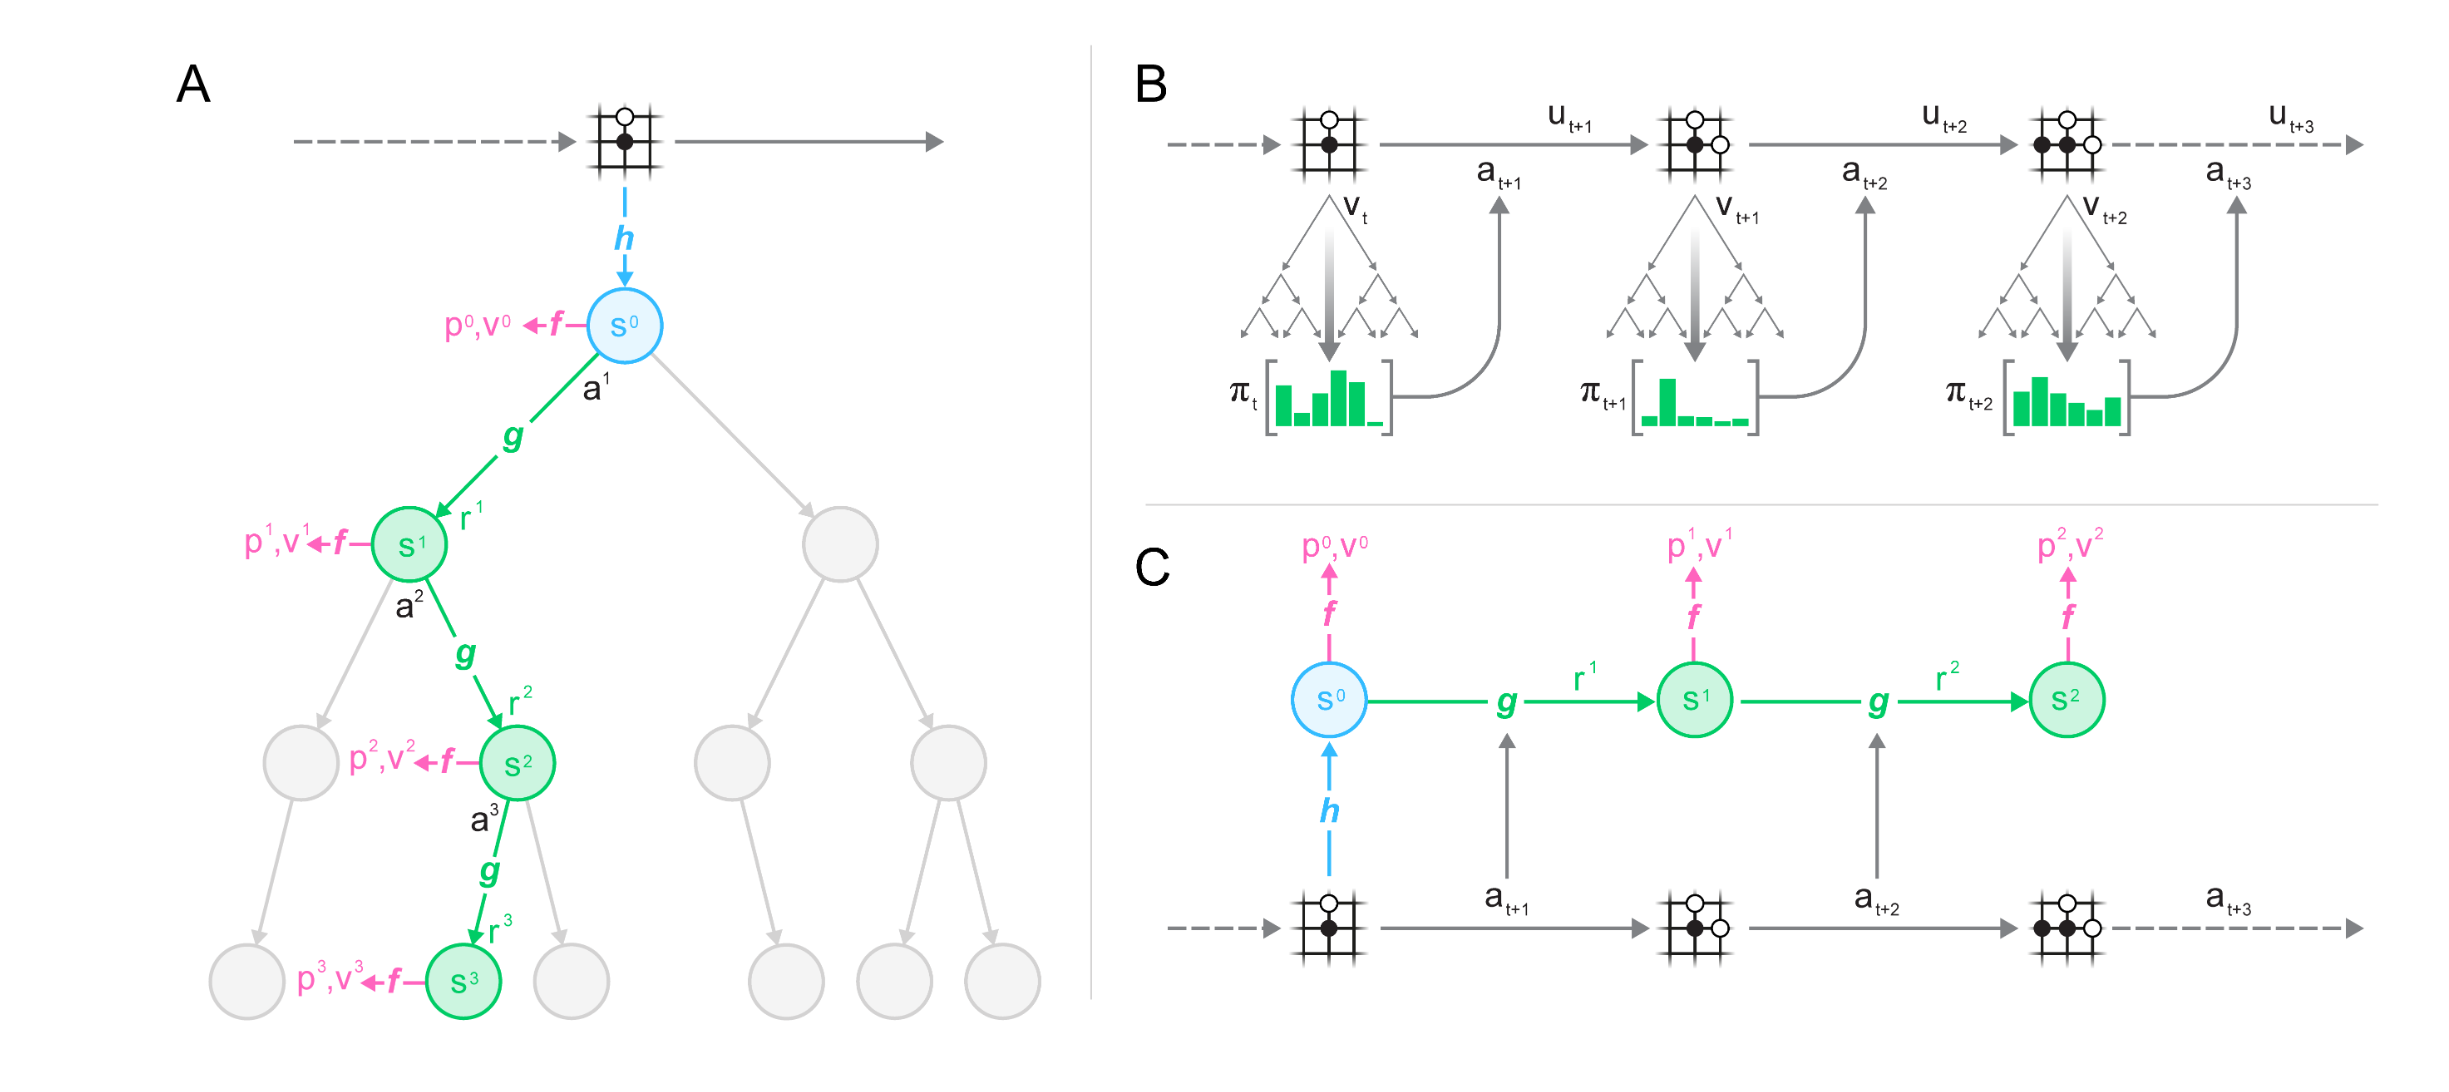

The models are trained to predict p(policy),v(value function),r(immediate reward) from the REPLAY buffer. 

### EfficientZero

#### Improvement 1

<AxesSubplot:>

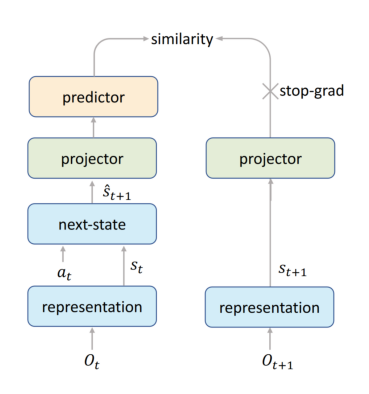

In [26]:
show_image(Image.open('efficient_similarity.png'),figsize=[7,7])

The general idea for this one is from this paper: https://arxiv.org/abs/2011.10566

1. The "representation" is generated using h from before. 
2. g then creates s_(t+1) using s_t and a_t for "next state"
3. The "projector" and "predictor" seem to be both thrown away. The projector mapping s_t+1 to a lower deminsional space. This seems to be because we want the predictor to have very few parameters. (lower deminsional space just has less numbers)
4. The "predictor" seems to "bridge" the gap between both branches and allows for smaller batch size training and more stable training. "Exploring Simple Siamese Representation Learning" suggests that the predictor should model the Expected value of what was before the projector, including the difference between O_t and O_(t+1)
5. Since the projector and representation is on both sides, and the predictor is sufficiently small, The hidden states for the two s_(t+1) must be similar. 

#### Improvement 2

Predicting when a player will lose a point at a particular timestep is hard. Though it is much easier to predict "if" a player will lose a point. 

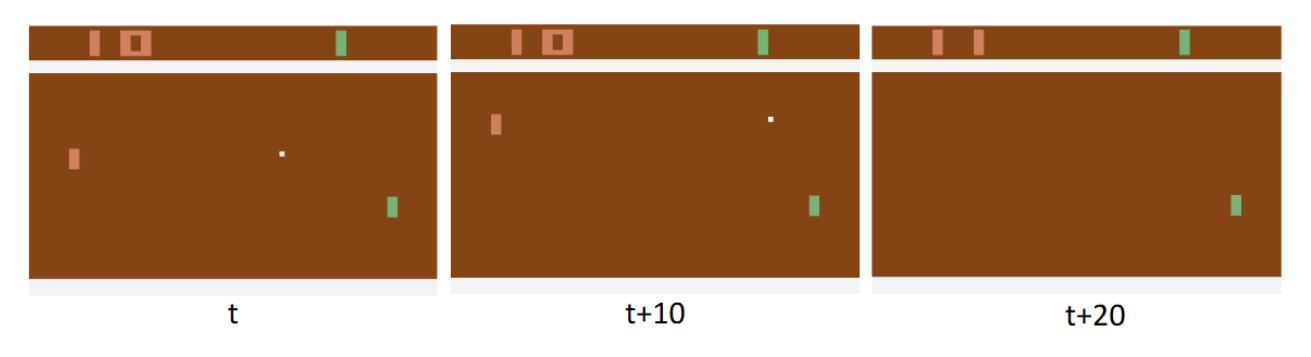

Predicting the immediate reward(r) is hard, how do we know 20 steps ahead of time, exactly which time step we will get the reward? Instead they use a LSTM to predict the total reward up until the current time, and train to predict that value instead. 

#### Improvement 3

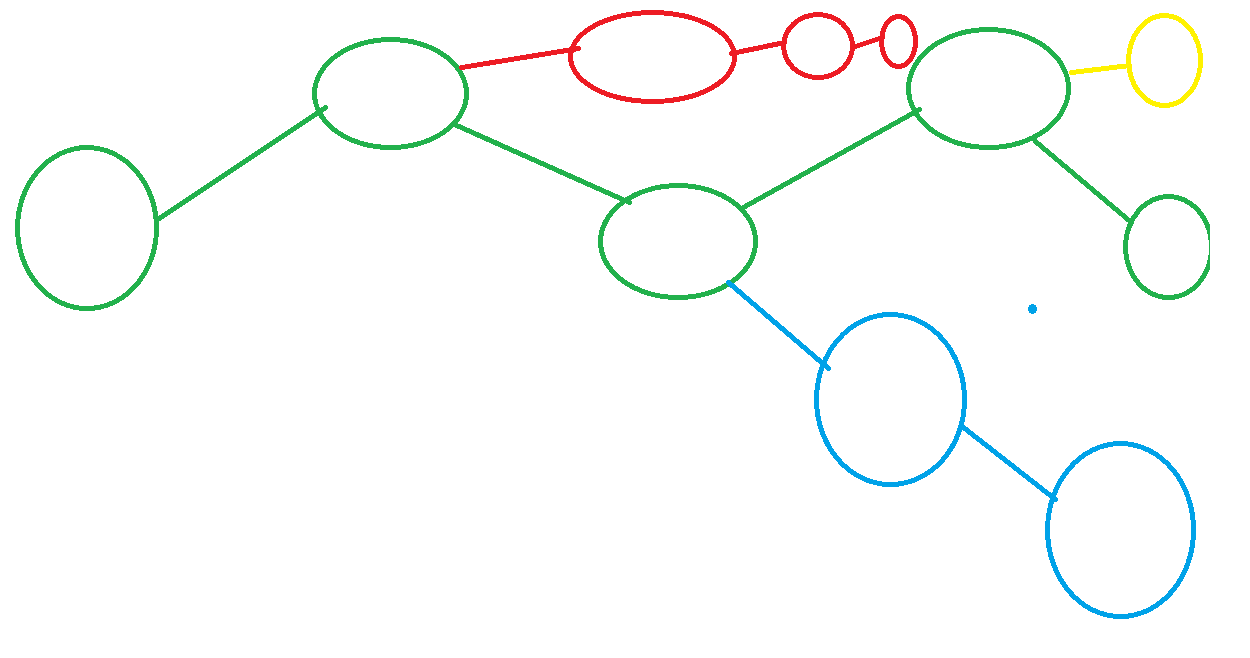

To use or not to use the replay buffer? 
- Green, MuZero uses the replayer buffer as is
- Yellow, on more recent examples, Efficient Zero will use its policy to predict 1 state for training. 
- Blue, on less recent examples, Efficient Zero will us its policy for part of the future states. 
- Red, Efficient Zero can dream up the majority of the policy if observations in the replay buffer are very old. 

#### Results

Results where inconsistent across different applications, so it may be better to think of this as a handful of techniques as opposed to something to always use together. More abalations in the other environments should help to determine what techniques generalize outside of atari and board games. 

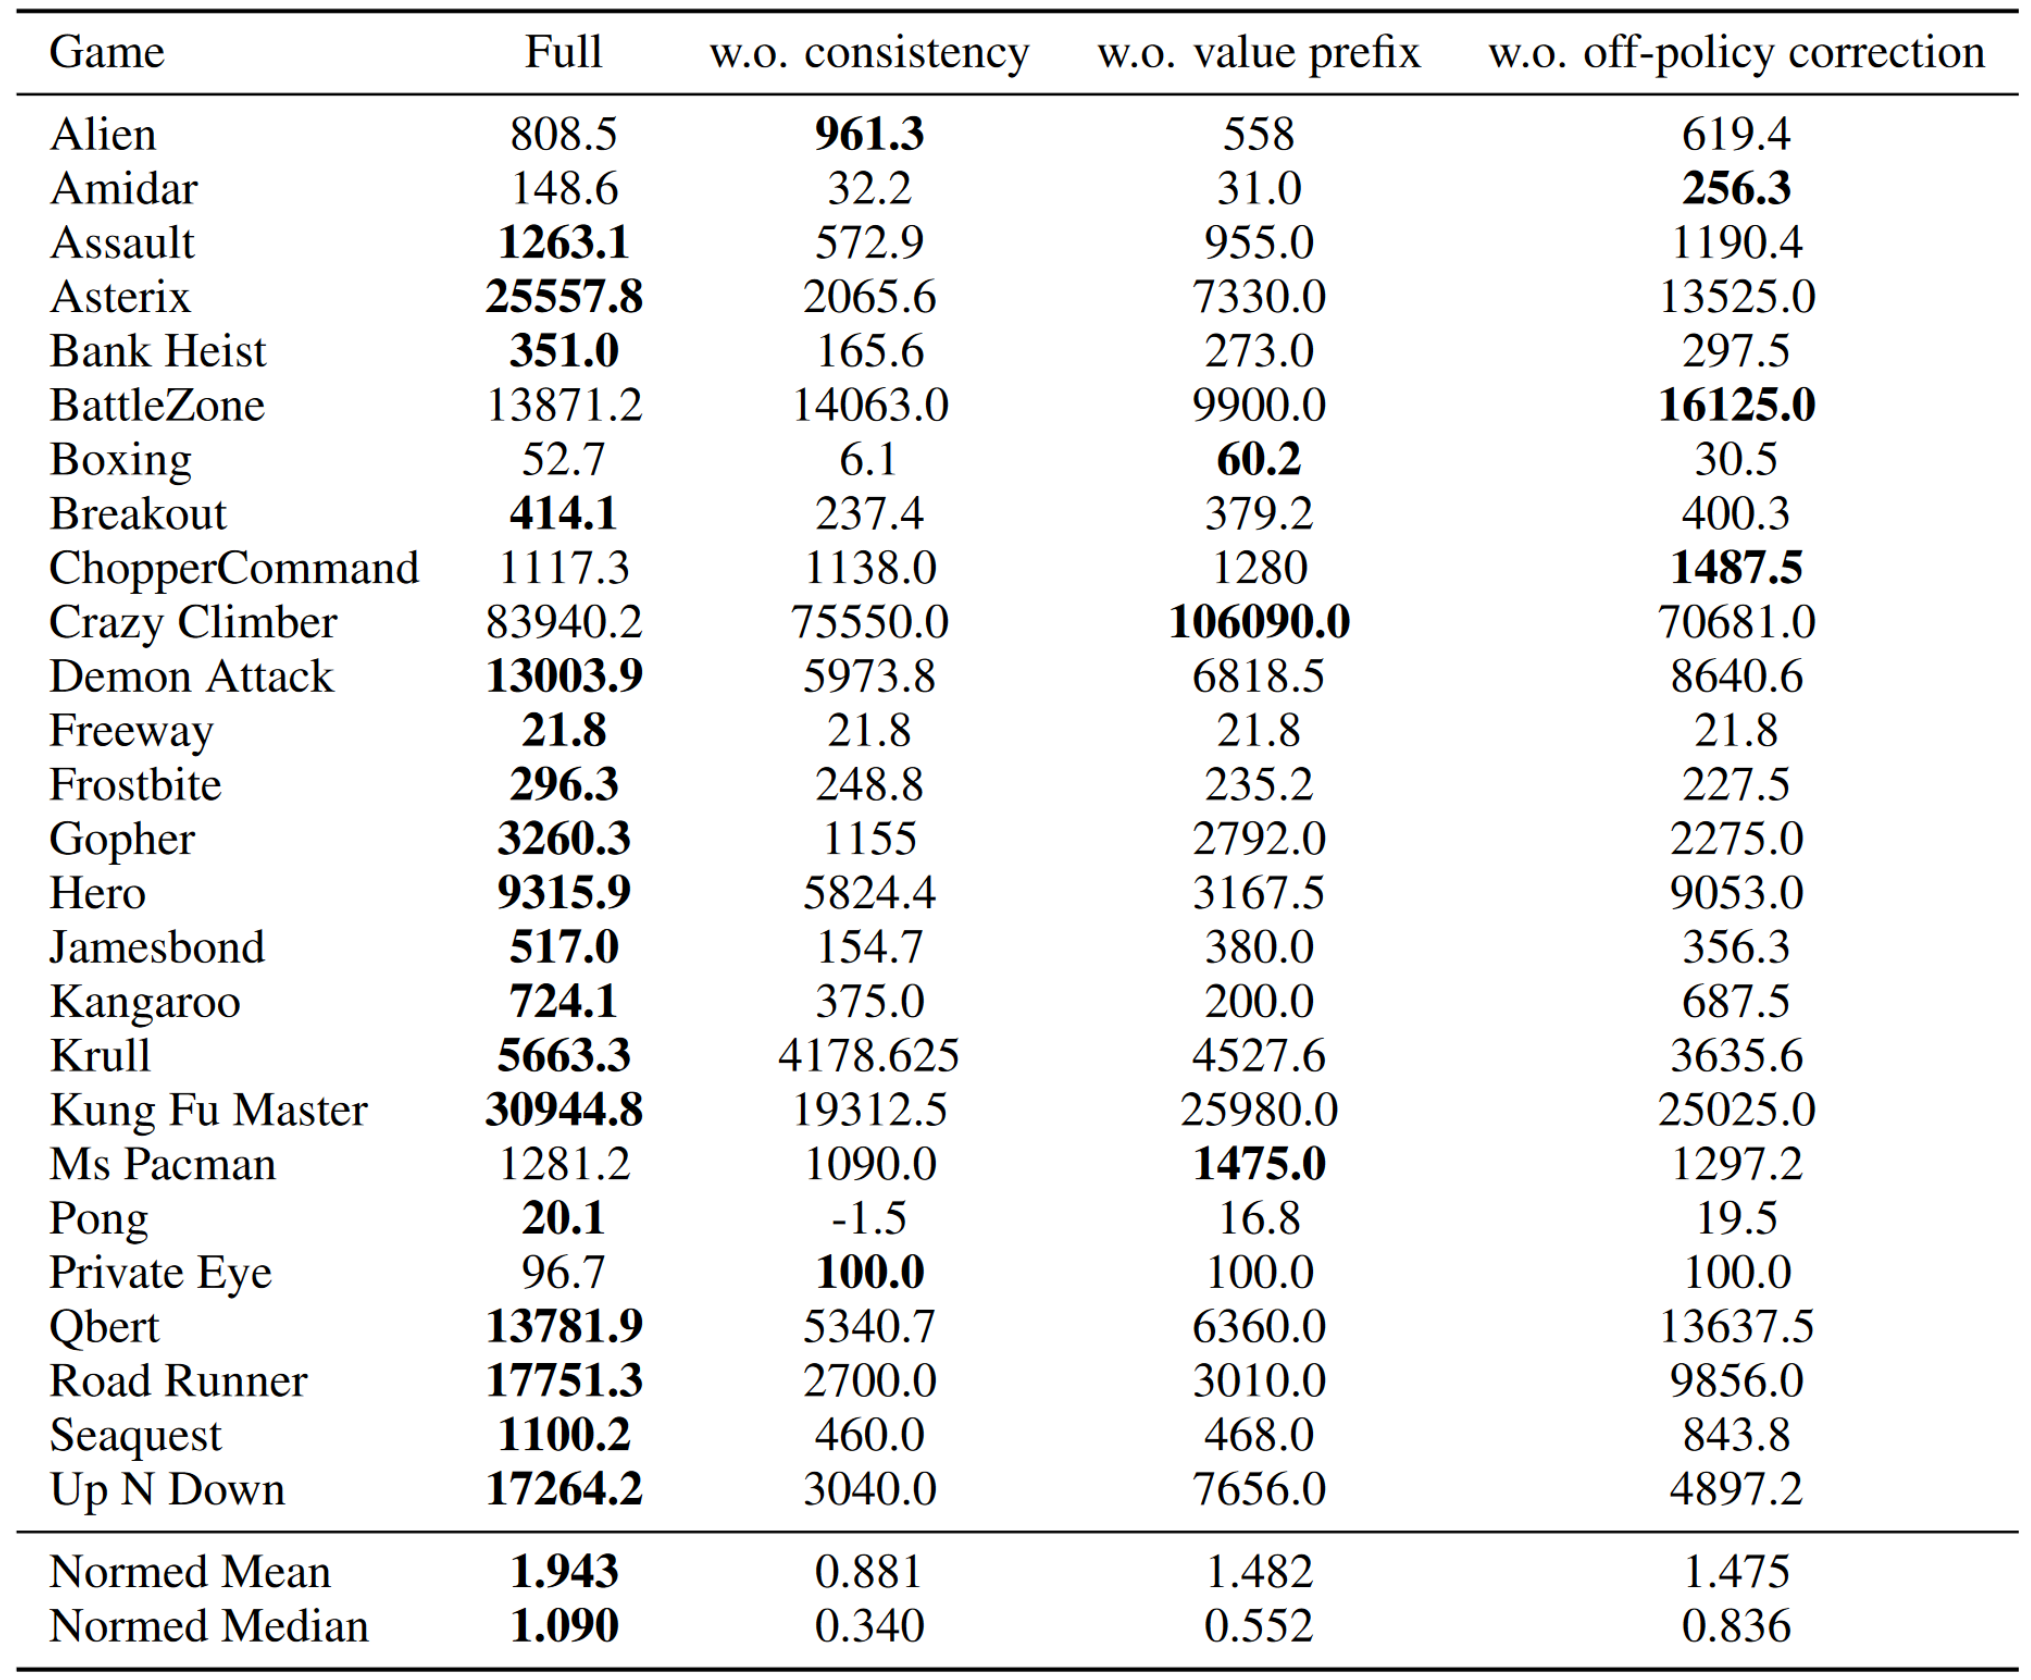

### References

- [Mu zero](https://arxiv.org/abs/1911.08265)
- [Efficient Zero](https://arxiv.org/abs/2111.00210)
- [Simple Siamese Representations](https://arxiv.org/abs/2011.10566)
- [Yanic Muzero](https://www.youtube.com/watch?v=We20YSAJZSE)
- [Yanic Efficient Zero](https://www.youtube.com/watch?v=NJCLUzkn-sA)
- Images are from their respective papers. 